## Corpus Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jeopardy_df = pd.read_csv('JEOPARDY_CSV.csv')
jeopardy_df = jeopardy_df.rename(columns={' Question': 'Question', ' Answer': 'Answer', ' Category': 'Category', " Air Date": "Air Date"})

# drop NaN values
print(jeopardy_df[jeopardy_df['Answer'].isnull()])
jeopardy_df.drop(jeopardy_df.index[[94817, 143297]], inplace=True)

# combine ' Question' column and ' Answer' column
jeopardy_df['Document'] = jeopardy_df['Question'] + " " + jeopardy_df['Answer']

# change date to year only
jeopardy_df['Air Date'] = jeopardy_df['Air Date'].str[:4]


        Show Number    Air Date             Round                Category  \
94817          4346  2003-06-23         Jeopardy!           GOING "N"SANE   
143297         6177  2011-06-21  Double Jeopardy!                 NOTHING   
178922         4573  2004-06-23         Jeopardy!  MUCH ADO ABOUT NOTHING   

        Value                                           Question Answer  
94817    $200                       It often precedes "and void"    NaN  
143297   $400  This word for "nothing" precedes "and void" to...    NaN  
178922   $200  Completes the title of the 1939 book by Agatha...    NaN  


Number of documents: 216887
Number of questtions per year:
Air Date
1984     1179
1985      888
1986     1409
1987     1275
1988     1290
1989     2062
1990     4337
1991     1444
1992     1885
1993     2132
1994     1136
1995     1138
1996     4891
1997    13094
1998    13126
1999    13535
2000    13437
2001    12095
2002     6857
2003     9422
2004    13190
2005    13560
2006    13726
2007    13940
2008    14036
2009    13579
2010    13756
2011    13375
2012     1093
Name: count, dtype: int64
10 most common Answers
Answer
China         216
Australia     215
Japan         196
Chicago       194
France        193
India         185
California    180
Canada        176
Spain         171
Mexico        164
Name: count, dtype: int64


/var/folders/6x/px2c4wgd07122kszz5ljmxgw0000gn/T/ipykernel_95058/1122483739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Answer', data=jeopardy_df[mask], palette=sns.color_palette("Blues", 10), order=top10.index.tolist())


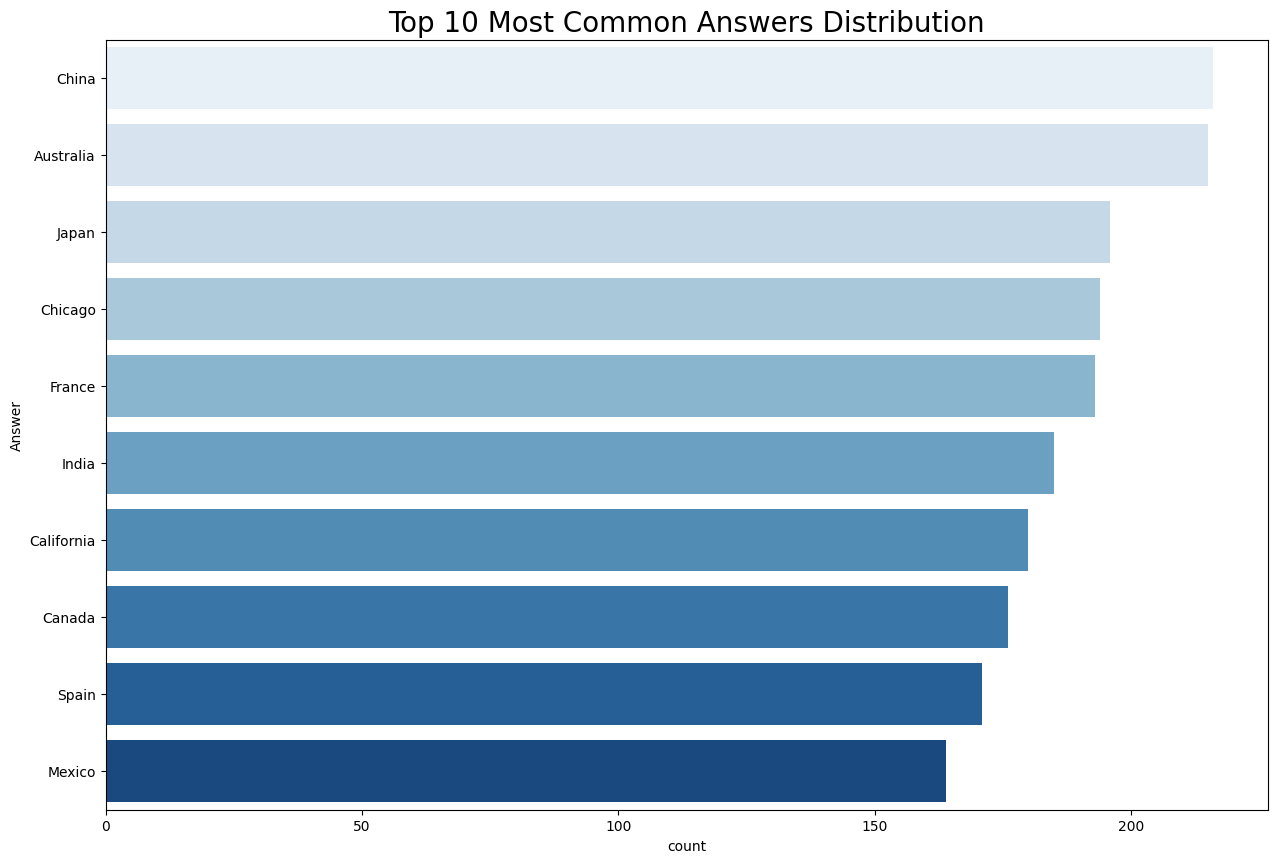

In [16]:
# number of documents 
print("Number of documents:", len(jeopardy_df))

print("Number of questtions per year:")
print(jeopardy_df['Air Date'].value_counts().sort_index())

print("10 most common Answers")
top10 = jeopardy_df['Answer'].value_counts()[:10]
print(top10)

# Visualize top 10 Answers:
mask = jeopardy_df['Answer'].map(lambda x: x in top10.index.tolist())

sns.countplot(y='Answer', data=jeopardy_df[mask], palette=sns.color_palette("Blues", 10), order=top10.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Most Common Answers Distribution', size=20)

plt.savefig("top10_answers.png")

Number of unique categories: 27993
10 most common cateogires
Category
BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
Name: count, dtype: int64
Question
Hainan                                      4
Abigail Smith                               4
Greenland                                   4
May 29, 1917 in Brookline, Massachusetts    3
Thomas Jefferson                            3
Sam Spade                                   3
California                                  3
Ankara                                      3
Dick Cheney                                 3
"You Must Love Me"                          3
Name: count, dtype: int64


/var/folders/6x/px2c4wgd07122kszz5ljmxgw0000gn/T/ipykernel_95058/2092244363.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=jeopardy_df[mask_c], palette=sns.color_palette("Blues", 10), order=top10_c.index.tolist())


10 most common questions
Question
Hainan                                      4
Abigail Smith                               4
Greenland                                   4
May 29, 1917 in Brookline, Massachusetts    3
Thomas Jefferson                            3
Sam Spade                                   3
California                                  3
Ankara                                      3
Dick Cheney                                 3
"You Must Love Me"                          3
Name: count, dtype: int64


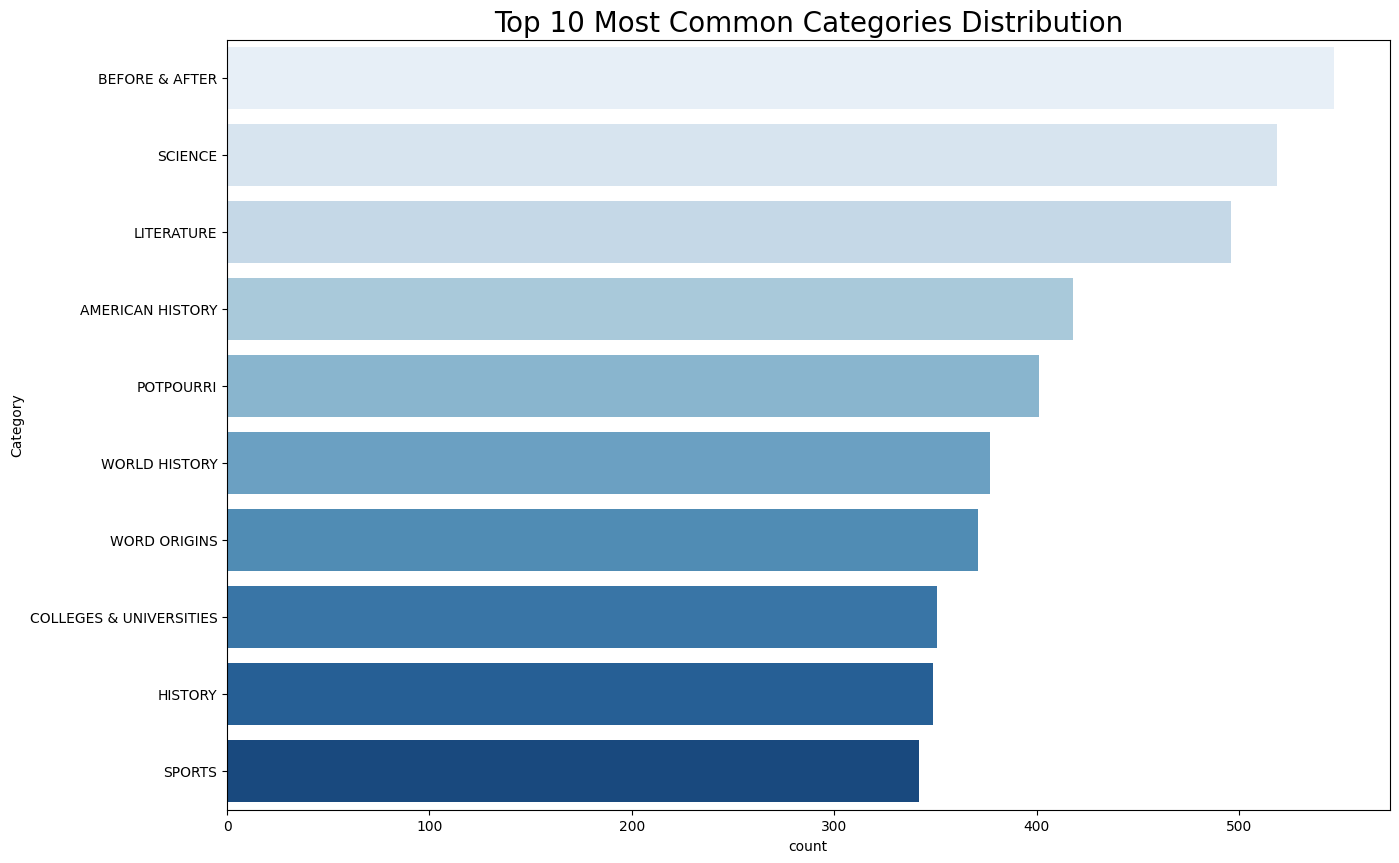

In [17]:
print("Number of unique categories:", len(jeopardy_df['Category'].unique()))

print("10 most common cateogires")
top10_c= jeopardy_df['Category'].value_counts()[:10]
print(top10_c)


mask1 = jeopardy_df[jeopardy_df['Question'] == ('[audio clue]')]
mask2 = jeopardy_df[jeopardy_df['Question'] == ('[video clue]')]
mask3 = jeopardy_df[jeopardy_df['Question'] == ('[filler]')]
mask4 = jeopardy_df[jeopardy_df['Question'] == ('(audio clue)')]

jeopardy_df.drop(mask1.index, inplace = True) 
jeopardy_df.drop(mask2.index, inplace = True)
jeopardy_df.drop(mask3.index, inplace = True)
jeopardy_df.drop(mask4.index, inplace = True)
jeopardy_df.shape

print(jeopardy_df['Question'].value_counts()[:10])

# Visualize top 10 common categories
mask_c = jeopardy_df['Category'].map(lambda x: x in top10_c.index.tolist())

sns.countplot(y='Category', data=jeopardy_df[mask_c], palette=sns.color_palette("Blues", 10), order=top10_c.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Most Common Categories Distribution', size=20)
plt.savefig("top10_categories.png")

print("10 most common questions")
print(jeopardy_df['Question'].value_counts()[:10])

## Modeling NER

In [59]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.5 MB/s eta 0:00:0000:0100:04
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [12]:
import spacy
nlp_web = spacy.load("en_core_web_lg")

ner_results = []

for document in jeopardy_df['Document']:
    text = str(document)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

jeopardy_df['ner_results'] = ner_results

In [13]:
display(jeopardy_df['ner_results'])

0          ((the, last, 8, years), (Galileo), (Copernicus))
1         ((2), (1912), (Carlisle, Indian, School), (6),...
2         ((Yuma), (4,055, hours), (each, year), (Arizona))
3         ((1963), (The, Art, Linkletter, Show), (billio...
4         ((Indep), (Constitution), (Mass.), (second), (...
                                ...                        
216925                         ((Puccini), (3), (Turandot))
216926                        ((North, America), (only, 4))
216927       ((Penny, Lane), (Hellraiser), (Clive, Barker))
216928             ((Sill), (Okla.), (Arizona), (Geronimo))
216929                                ((18th), (Catherine))
Name: ner_results, Length: 216887, dtype: object

In [14]:
# What is the average number of entities per document?
avg_ent_doc = jeopardy_df['ner_results'].apply(len).mean()
print("The average number of entities per document is", avg_ent_doc)



# What is the average number of entities of each type per document?
ent_type_counts = {}
total_doc = len(jeopardy_df)

# Iterate ner_results column to count entity types
for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        ent_type_counts[ent.label_] = ent_type_counts.get(ent.label_, 0) + 1

# Calculate the average
avg_ent_type_per_doc = {}
for ent_type, count in ent_type_counts.items():
    avg_ent_type_per_doc[ent_type] = count / total_doc

print("Average number of entities of each type per document:")
print(avg_ent_type_per_doc)

The average number of entities per document is 2.5419365844886967
Average number of entities of each type per document:
{'DATE': 0.33997888301281315, 'PRODUCT': 0.032929590063028216, 'ORG': 0.32894548774246496, 'CARDINAL': 0.1908505350712583, 'PERSON': 0.6706395496272253, 'GPE': 0.36354876041440937, 'TIME': 0.009373544749108982, 'WORK_OF_ART': 0.20073586706441604, 'LAW': 0.005860194479152738, 'ORDINAL': 0.0665968914688294, 'QUANTITY': 0.02333934260697967, 'FAC': 0.0370284987113105, 'LOC': 0.06626031066868923, 'NORP': 0.15916122220326714, 'EVENT': 0.02432603152793851, 'PERCENT': 0.004191122566128906, 'MONEY': 0.009571804672479218, 'LANGUAGE': 0.00859894783919737}


In [15]:
# What is the most common span for each entity type?

# Initialize a dictionary to store spans for each entity type
ent_type_spans = {}

# Iterate over the 'ner_results' column
for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    max_span = max(span_text, key = span_text.get)
    max_span_per_type[ent_type] = max_span

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

Most common span for each entity type:
DATE : 1996
PRODUCT : the Clue Crew
ORG : Congress
CARDINAL : one
PERSON : Shakespeare
GPE : U.S.
TIME : night
WORK_OF_ART : Oscar
LAW : Constitution
ORDINAL : first
QUANTITY : a mile
FAC : Broadway
LOC : Earth
NORP : French
EVENT : WWII
PERCENT : 50%
MONEY : 1
LANGUAGE : English
